**prediction of  which individuals are most likely to have or use a bank account.**

In [ ]:
#loading dependencies
# Let's start by importing the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Set the styles of all graphs to Seaborn one
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [ ]:
#uploading the dataset
data=pd.read_csv("Financial Dataset - 1.csv")
var = pd.read_csv('VariableDefinitions.csv')
data

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
var

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


**Checking the Data**

In [ ]:
#determine the number of records in our dataset
data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


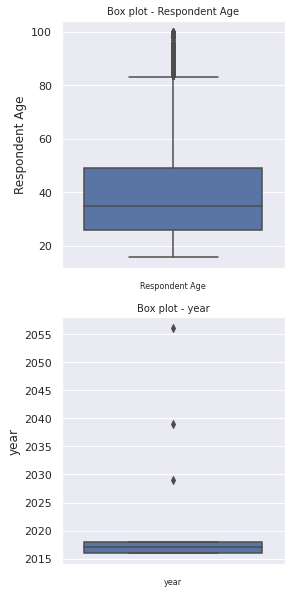

In [ ]:
#Checking outliers columns
col_names = ['Respondent Age', 'year']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
# Remove outliers from the columms using outlier function 
def remove_outliers(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    #return df 

for col in col_names:
    remove_outliers(data,col)

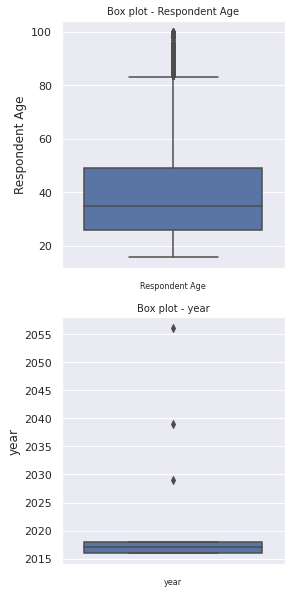

In [ ]:
#Check outliers again 
col_names = ['Respondent Age', 'year']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#Out box plot now looks better

In [ ]:
#Checking for anormalies
#The years under study were 2016 to 2018. But we have some up to 2059. 
# Lets remove them 

data = data[data['year']<=2018]

#We can also remove those whose age is above 80 years 
data = data[data['Respondent Age']<+80]

In [ ]:
#Checking for null values
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        33
Type of Location          14
Cell Phone Access         10
household_size            21
Respondent Age             0
gender_of_respondent      26
The relathip with head     0
marital_status            27
Level of Educuation       25
Type of Job               26
dtype: int64

In [ ]:
#get all column names 
data_columns = data.columns.to_list()
data_columns

['country',
 'year',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'household_size',
 'Respondent Age',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

In [ ]:
#Drop all na rows on specific columns 
def drop_nans(data, cols):
    df = data.dropna(subset=cols, inplace=True)
    return df

# Drop null values using the finction imported
drop_nans(data, data_columns)

In [ ]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

**Analysis**

In [ ]:
#Get all column names
data_columns=data.columns.to_list()
data_columns

['country',
 'year',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'household_size',
 'Respondent Age',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

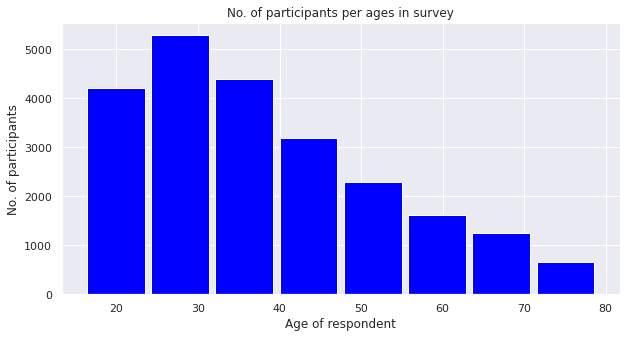

In [ ]:
#plot univariate summaries observations
data['Respondent Age']=data['Respondent Age'].astype(int)
fig=plt.figure(figsize=(10,5))
plt.hist(data['Respondent Age'], color='blue',bins=8,rwidth=0.9)
plt.xlabel("Age of respondent")
plt.ylabel("No. of participants")
plt.title("No. of participants per ages in survey")
plt.show()

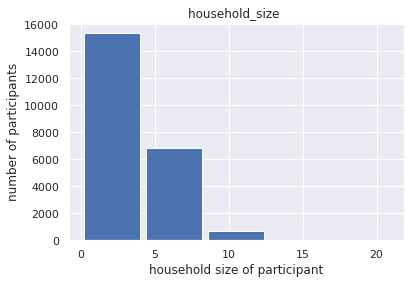

In [ ]:
plt.hist(data['household_size'],bins=5,histtype='bar',rwidth=0.9)
plt.xlabel("household size of participant")
plt.ylabel("number of participants")
plt.title("household_size ")
plt.show()

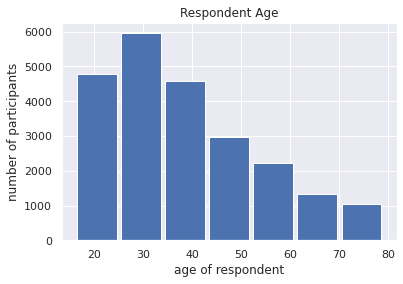

In [ ]:
plt.hist(data['Respondent Age'],bins=7,histtype='bar',rwidth=0.9)
plt.xlabel("age of respondent")
plt.ylabel("number of participants")
plt.title("Respondent Age")
plt.show()

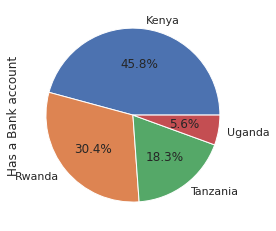

In [ ]:
#determining proportions that have bank accounts in different countries
data[data['Has a Bank account']=='Yes'].groupby('country').count()['Has a Bank account'].plot(kind='pie',autopct = '%1.1f%%')

#Kenya has the highest number of participants with bank accounts at 46.1%

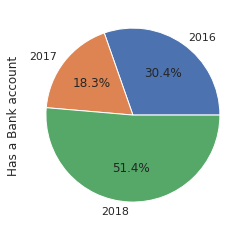

In [ ]:
#determining proportions that have bank accounts in different years
data[data['Has a Bank account']=="Yes"].groupby('year').count()['Has a Bank account'].plot(kind='pie',autopct = '%1.1f%%')
#2018 has the highest number of bank account holders

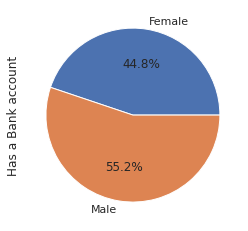

In [ ]:
#determining proportions that have bank accounts according to gender
data[data['Has a Bank account']=="Yes"].groupby('gender_of_respondent').count()['Has a Bank account'].plot(kind='pie',autopct = '%1.1f%%')
#55.1% of males have bank accounts and 44.9% of females have bank accounts

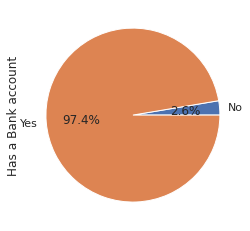

In [ ]:
#determining proportions that have bank accounts and have cell phone access
data[data['Has a Bank account']=='Yes'].groupby('Cell Phone Access').count()['Has a Bank account'].plot(kind = 'pie',autopct = '%1.1f%%')
#96.8% have cell phone access and have bank accounts

In [ ]:
#Distribution of account holders per country
Account_holders= data.groupby(['country', 'Has a Bank account']).count()['Respondent Age']
Account_holders

country   Has a Bank account
Kenya     No                    4423
          Yes                   1489
Rwanda    No                    7539
          Yes                    987
Tanzania  No                    5771
          Yes                    595
Uganda    No                    1895
          Yes                    181
Name: Respondent Age, dtype: int64

**Univariate Analysis**

In [ ]:
#mean
data['household_size'].mean()

3.7148164335664338

In [ ]:
#median
data['household_size'].median()

3.0

In [ ]:
#mode
data['household_size'].mode()

0    2.0
dtype: float64

In [ ]:
#std deviation
data['household_size'].std()

2.285552458988868

In [ ]:
#variance
data['household_size'].var()

5.223750042790061

In [ ]:
#quartiles
data.quantile([0.25,0.5,0.75])

,year,household_size,Respondent Age
0.25,2016.0,2.0,26.0
0.50,2017.0,3.0,35.0
0.75,2018.0,5.0,48.0


In [ ]:
#range
max=data['household_size'].max()
min=data['household_size'].min()
range=max-min
print(range)

21.0


In [ ]:
#skewness
data['household_size'].skew()
#positively skewed

0.964625423476768

In [ ]:
#kurtosis
data['household_size'].kurt()
#platykurtic distr

1.1363670236008603

**Bivariate Analysis**

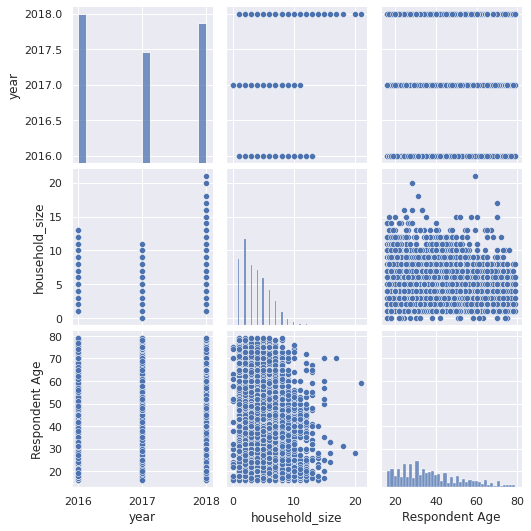

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(data)
plt.show()

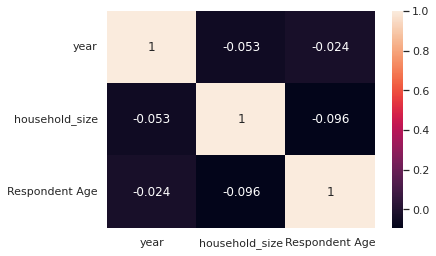

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

**Multivariate Analysis- Principal Component Analysis**

In [ ]:
grouped = data.groupby(['country','Has a Bank account']).count()['uniqueid']#.plot(kind='bar')

In [ ]:
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
data.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age              int64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#converting categorical columns to numerical
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data["country"]=data["country"].astype('category')
data["country"]=data["country"].cat.codes
data["Has a Bank account"]=data["Has a Bank account"].astype('category')
data["Has a Bank account"]=data["Has a Bank account"].cat.codes
data["Type of Location"]=data["Type of Location"].astype('category')
data["Type of Location"]=data["Type of Location"].cat.codes
data["Cell Phone Access"]=data["Cell Phone Access"].astype('category')
data["Cell Phone Access"]=data["Cell Phone Access"].cat.codes
data["gender_of_respondent"]=data["gender_of_respondent"].astype('category')
data["gender_of_respondent"]=data["gender_of_respondent"].cat.codes
data["The relathip with head"]=data["The relathip with head"].astype('category')
data["The relathip with head"]=data["The relathip with head"].cat.codes
data["marital_status"]=data["marital_status"].astype('category')
data["marital_status"]=data["marital_status"].cat.codes
data["Level of Educuation"]=data["Level of Educuation"].astype('category')
data["Level of Educuation"]=data["Level of Educuation"].cat.codes
data["Type of Job"]=data["Type of Job"].astype('category')
data["Type of Job"]=data["Type of Job"].cat.codes

Our_Columns = data[[
    'country', 'Has a Bank account', 'Type of Location', 'Cell Phone Access', 'gender_of_respondent',
    'The relathip with head', 'marital_status','Level of Educuation','Type of Job'
]]
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2018,uniqueid_1,1,0,1,3.0,24,0,5,2,4,9
1,0,2018,uniqueid_2,0,0,0,5.0,70,0,1,4,1,4
2,0,2018,uniqueid_3,1,1,1,5.0,26,1,3,3,6,9
3,0,2018,uniqueid_4,0,0,1,5.0,34,0,1,2,3,3
4,0,2018,uniqueid_5,0,1,0,8.0,26,1,0,3,3,5


In [ ]:
#create columns and features
X=data.drop(['year', 'Has a Bank account','uniqueid'],axis=1)
y= data['Has a Bank account']
#print(X.head())
#print("---------------------------------------------- \n Y")
#print(y.head())
import numpy as np
print(X.shape)
print(y.shape)
X.head()

(22880, 10)
(22880,)


,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,0,1,3.0,24,0,5,2,4,9
1,0,0,0,5.0,70,0,1,4,1,4
2,0,1,1,5.0,26,1,3,3,6,9
3,0,0,1,5.0,34,0,1,2,3,3
4,0,1,0,8.0,26,1,0,3,3,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18823459, 0.15820772, 0.15403013, 0.10279594, 0.08514259,
       0.08209036, 0.07300185, 0.05864239, 0.05430312, 0.0435513 ])

In [ ]:
pca = PCA(n_components=7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(max_depth=7, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#with PCA component_no of 7, Our model has 87.76% accuracy

[[3897   49]
 [ 511  119]]
Accuracy 0.8776223776223776


# ** Discriminant Analysis**

In [ ]:
# we will use X and y values used in PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance


cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The LDA ccuracy ' + str(accuracy_score(y_test, y_pred)))

#this gives us 87% accuracy

[[3823  123]
 [ 430  200]]
The LDA ccuracy 0.8791520979020979
